In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\nilvi\OneDrive\Escritorio\Ironhack\Week4\Group Project\football\ft_aggregated.csv")
df

,season,leagueName,teamName,total_games,won,drawn,lost,ht_won,ht_drawn,ht_lost,...,shots_per_game,shotsOnTarget_per_game,corners_per_game,win_ratio,drawn_ratio,loss_ratio,ht_win_ratio,ht_drawn_ratio,ht_lost_ratio,ht_ft_win_ratio
0,2017,Premier League,Manchester City,38,32,4,2,24,11,3,...,17.45,6.95,7.47,0.8421,0.1053,0.0526,0.63,0.29,0.08,0.58
1,2019,Premier League,Liverpool,38,32,3,3,24,9,5,...,15.55,6.08,6.79,0.8421,0.0789,0.0789,0.63,0.24,0.13,0.61
2,2015,Bundesliga,Bayern Munich,34,28,4,2,19,11,4,...,18.44,7.74,6.71,0.8235,0.1176,0.0588,0.56,0.32,0.12,0.53
3,2018,Premier League,Manchester City,38,32,2,4,25,11,2,...,17.97,6.84,7.55,0.8421,0.0526,0.1053,0.66,0.29,0.05,0.63
4,2018,Premier League,Liverpool,38,30,7,1,21,14,3,...,15.13,5.95,6.55,0.7895,0.1842,0.0263,0.55,0.37,0.08,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2015,Ligue 1,Troyes,38,3,9,26,3,13,22,...,11.76,4.00,5.42,0.0789,0.2368,0.6842,0.08,0.34,0.58,0.03
682,2019,Ligue 1,Toulouse,28,3,4,21,2,12,14,...,11.29,3.46,4.39,0.1071,0.1429,0.7500,0.07,0.43,0.50,0.00
683,2015,Premier League,Aston Villa,38,3,8,27,4,14,20,...,10.00,2.89,4.39,0.0789,0.2105,0.7105,0.11,0.37,0.53,0.03
684,2018,Premier League,Huddersfield,38,3,7,28,4,13,21,...,10.55,3.11,4.26,0.0789,0.1842,0.7368,0.11,0.34,0.55,0.05


In [4]:
df.columns

Index(['season', 'leagueName', 'teamName', 'total_games', 'won', 'drawn',
       'lost', 'ht_won', 'ht_drawn', 'ht_lost', 'ht_ft_won', 'GF', 'GA', 'GD',
       'points_per_game', 'GF_per_game', 'xG_per_game', 'GF_to_xG_per_game',
       'GA_per_game', 'GD_per_game', 'shots_per_game',
       'shotsOnTarget_per_game', 'corners_per_game', 'win_ratio',
       'drawn_ratio', 'loss_ratio', 'ht_win_ratio', 'ht_drawn_ratio',
       'ht_lost_ratio', 'ht_ft_win_ratio'],
      dtype='object')

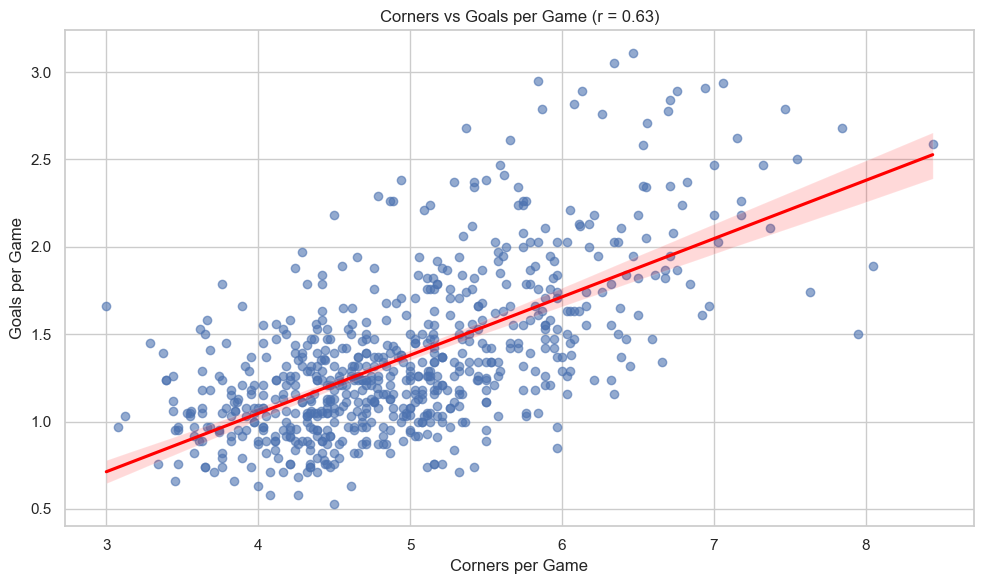

In [8]:
## Correlation between corner kicks and goals

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='corners_per_game',
    y='GF_per_game',        
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)

corr = df['corners_per_game'].corr(df['GF_per_game'])
plt.title(f"Corners vs Goals per Game (r = {corr:.2f})")
plt.xlabel("Corners per Game")
plt.ylabel("Goals per Game")  
plt.tight_layout()
plt.show()

##conclusion: it has a moderate positive correlation, which means that teams that take more corner kicks tend to score more goals per game.

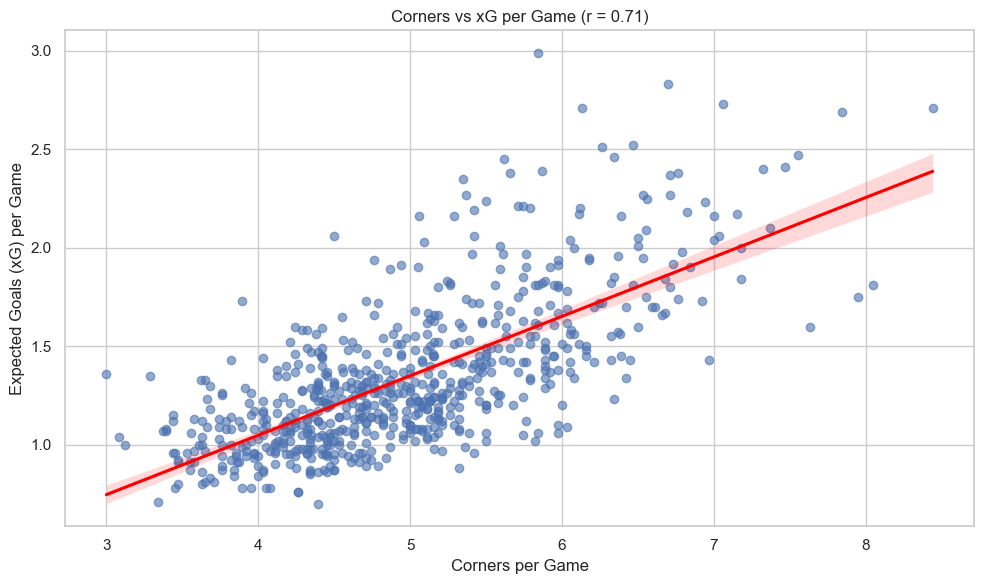

In [ ]:
## Correlation between corner kicks and xG

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='corners_per_game',
    y='xG_per_game',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)


corr = df['corners_per_game'].corr(df['xG_per_game'])

plt.title(f"Corners vs xG per Game (r = {corr:.2f})")
plt.xlabel("Corners per Game")
plt.ylabel("Expected Goals (xG) per Game")

plt.tight_layout()
plt.show()

## Conclusion: it has a moderate positive correlation, which means that teams that take more corner kicks tend to have a higher expected goals per game.

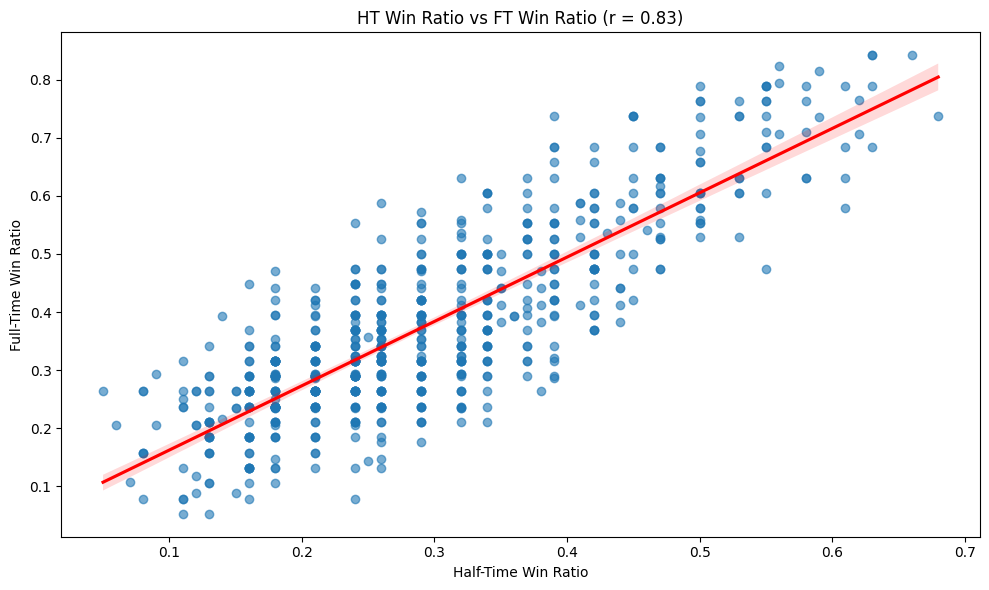

In [ ]:
## Impact of half-time result on full-time outcome

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='ht_win_ratio',
    y='win_ratio',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
corr = df['ht_win_ratio'].corr(df['win_ratio'])
plt.title(f"HT Win Ratio vs FT Win Ratio (r = {corr:.2f})")
plt.xlabel("Half-Time Win Ratio")
plt.ylabel("Full-Time Win Ratio")
plt.tight_layout()
plt.show()

## Conclusion: it has a strong positive correlation, which means that teams that are leading at half-time are more likely to win the match.

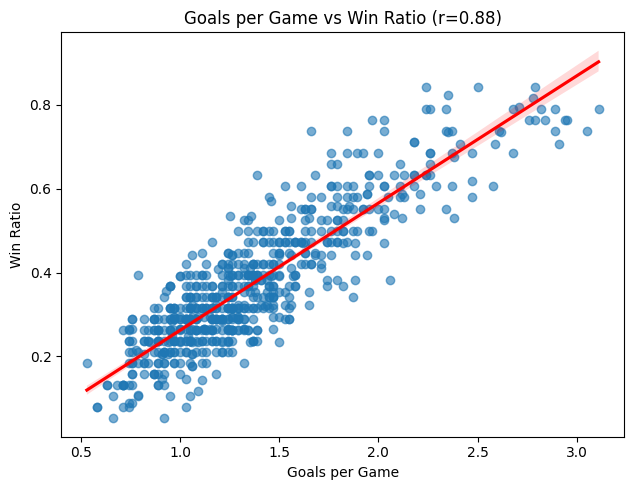

In [6]:
# Goals vs Win Ratio

plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.regplot(data=df, x='GF_per_game', y='win_ratio', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f"Goals per Game vs Win Ratio (r={df['GF_per_game'].corr(df['win_ratio']):.2f})")
plt.xlabel("Goals per Game")
plt.ylabel("Win Ratio")
plt.tight_layout()
plt.show()

## Conclusion: it has a strong positive correlation, which means that teams that score more goals per game tend to have a higher win ratio.

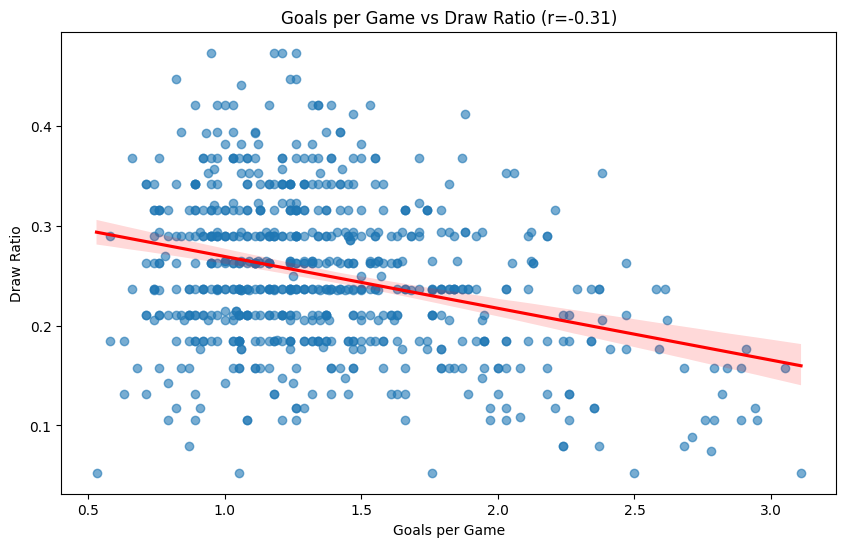

In [10]:
# Goals vs Draw Ratio
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='GF_per_game', y='drawn_ratio', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f"Goals per Game vs Draw Ratio (r={df['GF_per_game'].corr(df['drawn_ratio']):.2f})")
plt.xlabel("Goals per Game")
plt.ylabel("Draw Ratio")
plt.show()

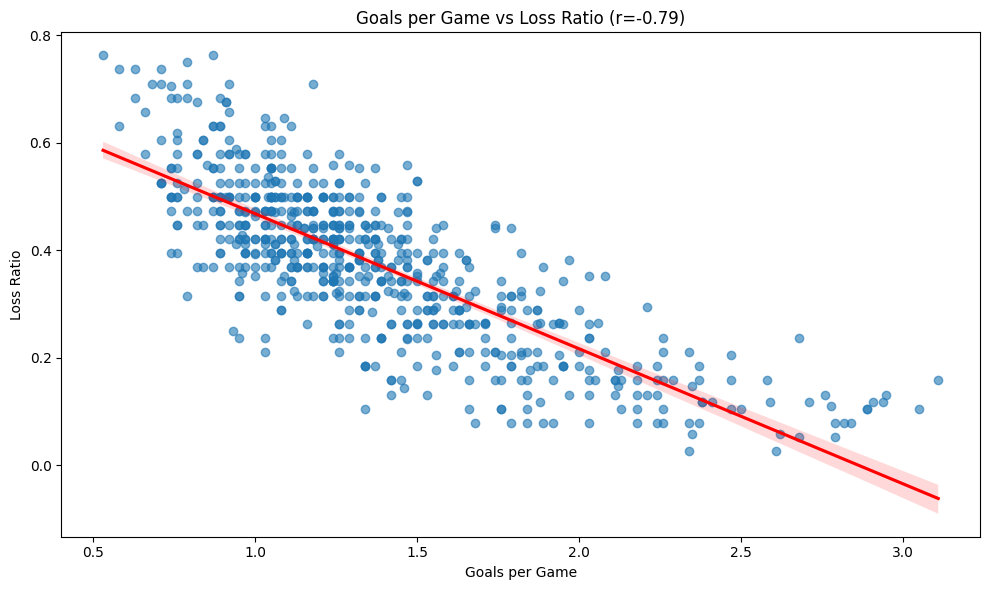

In [11]:
# Goals vs Loss Ratio

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='GF_per_game', y='loss_ratio', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f"Goals per Game vs Loss Ratio (r={df['GF_per_game'].corr(df['loss_ratio']):.2f})")
plt.xlabel("Goals per Game")
plt.ylabel("Loss Ratio")

plt.tight_layout()
plt.show()

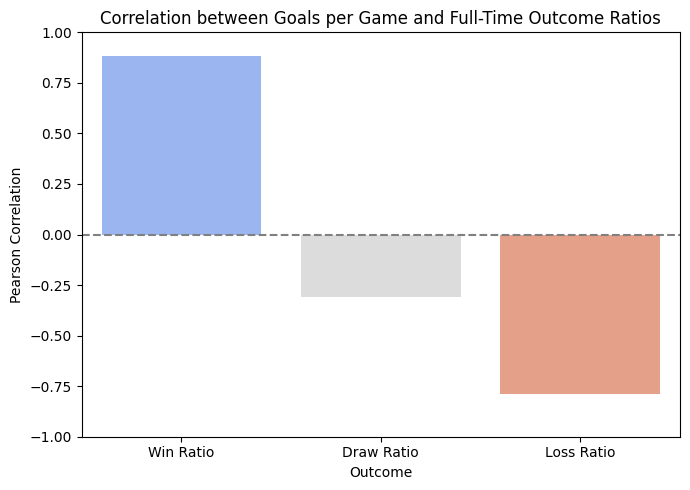

In [15]:
correlations = {
    'Win Ratio': df['GF_per_game'].corr(df['win_ratio']),
    'Draw Ratio': df['GF_per_game'].corr(df['drawn_ratio']),
    'Loss Ratio': df['GF_per_game'].corr(df['loss_ratio']),
}

corr_df = pd.DataFrame({
    'Outcome': list(correlations.keys()),
    'Correlation': list(correlations.values())
})

plt.figure(figsize=(7,5))
sns.barplot(data=corr_df, x='Outcome', y='Correlation', hue='Outcome', palette='coolwarm', dodge=False)
plt.title('Correlation between Goals per Game and Full-Time Outcome Ratios')
plt.ylabel('Pearson Correlation')
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

## Conclusion: win ratio has strong positive correlation, drawn ratio has weak negative correlation, and loss ratio has strong negative correlation. 
## This means that teams that score more goals per game tend to have a higher win ratio and lower drawn and loss ratios.